In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from joblib import dump, load

from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.svm import SVC  
from sklearn.metrics import classification_report, plot_confusion_matrix  
from sklearn.model_selection import StratifiedKFold

In [2]:
dataRead = pd.read_csv('aprobados_reprobados.csv')
data = dataRead.drop(['ID','Nota primera oportunidad','Nota segunda oportunidad','intento'],axis=1)
x=data[["Session 2","Session 3","Session 4","Session 5","Session 6"]]
y=data[["aprobar"]]
len(x)


115

## Division del set de entrenamiento y prueba

In [3]:
X=x.index.to_numpy()
Y=y.index.to_numpy()


skf = StratifiedKFold(n_splits=7)
for train_index, test_index in skf.split(x, y):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]


dataXTrain = x.iloc[X_train].to_numpy()
dataYTrain = y.iloc[y_train].to_numpy()
dataXTest = x.iloc[X_test].to_numpy()
dataYTest = y.iloc[y_test].to_numpy()
#X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.10)
#len(dataXTest)

In [4]:
def getParametros(X_train,Y_train,param_grid):
    grid = GridSearchCV(SVC(), param_grid,refit=True,cv=5,n_jobs=-1,verbose=2)  # verbose se usa solo para efectos de demostración
    grid.fit(X_train, Y_train)
    return {"C": grid.best_estimator_.C,"Gamma":grid.best_estimator_.gamma,"kernel:":grid.best_estimator_.kernel}

## Tuneando parámetros

In [5]:
param_grid = {
    'C': [0.1,1, 5,10,20,50,75,100], 
    'gamma': [1,0.1,0.01,10,50,100],
    'kernel': ['rbf', 'linear','sigmoid'],
}
#getParametros(dataXTrain,dataYTrain,param_grid)


## Realizando el entrenamiento

In [6]:
svc=SVC(C=10, gamma=1, kernel='linear', max_iter=-1)
svc.fit(dataXTrain,dataYTrain)

C:\Users\jonat\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVC(C=10, gamma=1, kernel='linear')

## Obteniendo metricas

In [7]:
def getMetricas(x_Test,y_Test,svc):
    grid_predictions = svc.predict(x_Test)
    disp = plot_confusion_matrix(svc,x_Test,y_Test,display_labels=['Reprueba','Aprueba'],cmap=plt.cm.Blues)
    disp.ax_.set_title('Matriz de confusión')
    plt.show()
    print(classification_report(y_Test,grid_predictions))
    

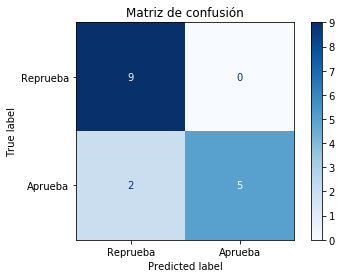

              precision    recall  f1-score   support

           0       0.82      1.00      0.90         9
           1       1.00      0.71      0.83         7

    accuracy                           0.88        16
   macro avg       0.91      0.86      0.87        16
weighted avg       0.90      0.88      0.87        16



In [8]:
getMetricas(dataXTest,dataYTest,svc)

In [9]:
dataYTest

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]], dtype=int64)

In [10]:
 svc.predict(dataXTest)

array([1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [11]:
dump(svc, 'svc.joblib') 

['svc.joblib']